### Introduction to Risk Parity in Finance

Risk parity is an investment strategy that focuses on allocating risk, rather than capital, equally across various assets in a portfolio. The goal is to achieve a more balanced and diversified portfolio by ensuring that each asset contributes equally to the overall risk. This approach contrasts with traditional portfolio management techniques, which often allocate capital based on expected returns or market capitalization.

In a risk parity portfolio, assets with higher volatility receive lower capital allocations, while assets with lower volatility receive higher allocations. This helps to mitigate the impact of any single asset's performance on the overall portfolio, leading to potentially more stable returns over time.

In this project, we will build a Python-based risk parity portfolio using historical financial data. We will leverage libraries such as `pandas`, `numpy`, and `scipy` to perform data manipulation, statistical analysis, and optimization. By the end of this project, you will have a solid understanding of how to construct and analyze a risk parity portfolio, as well as the benefits and limitations of this investment strategy.

Let's dive into the world of risk parity and explore how this innovative approach can enhance portfolio management and improve risk-adjusted returns.


In [1]:
#libraries 
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#Loading the data from yahoo finance
tickers = ['SPY', 'TLT', 'GLD']  # S&P 500, 20+ Year Treasury Bond, Gold
data = yf.download(tickers, start="2015-01-01", end="2024-01-01")['Adj Close']
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


### Mathematics Behind the Risk Parity Objective Function

#### Portfolio Variance

The portfolio variance is calculated as follows:

$$
\text{Portfolio Variance} = w^T \Sigma w
$$

Where:
- \( w \) is the vector of portfolio weights
- \( \Sigma \) is the covariance matrix of asset returns

This formula calculates the overall risk (variance) of the portfolio by considering the weights of the assets and their covariances.

```python
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))
  v_matrix, weights))


### Mathematics Behind the Risk Parity Objective Function

#### Portfolio Variance

The portfolio variance is calculated as follows:

$$
\text{Portfolio Variance} = w^T \Sigma w
$$

Where:
- \( w \) is the vector of portfolio weights
- \( \Sigma \) is the covariance matrix of asset returns

This formula calculates the overall risk (variance) of the portfolio by considering the weights of the assets and their covariances.

```python
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))
v_matrix, weights))  
```
## Risk Contribution

The risk contribution of each asset is the portion of the portfolio's total risk attributable to that asset. The risk contribution of each asset can be derived as:

$$
\text{Risk Contribution}_i = \frac{w_i \cdot \text{Marginal Contribution}_i}{\text{Portfolio Variance}}
$$

Where:
- \( w_i \) is the weight of asset \( i \)
- The marginal contribution is the change in portfolio variance due to a small change in the weight of asset \( i \), which is computed as \( \text{Marginal Contribution}_i = \Sigma w \).

The total risk contribution for all assets is normalized by the portfolio variance.

```python
def calculate_risk_contribution(weights, cov_matrix):
    portfolio_variance = calculate_portfolio_variance(weights, cov_matrix)
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(weights, marginal_contrib) / portfolio_variance
    return risk_contrib
```

#### Risk Parity Objective Function

The risk parity objective function aims to equalize the risk contributions of all assets in the portfolio. The objective function is the sum of the squared differences between the individual risk contributions and the target risk, which is the average risk contribution across all assets:

$$
\text{Risk Parity Objective} = \sum_{i=1}^{n} \left( \text{Risk Contribution}_i - \text{Target Risk} \right)^2
$$

Where:
- \( \text{Target Risk} \) is the average risk contribution across all assets.

The objective is minimized to achieve an optimal risk parity portfolio.

```python
def risk_parity_objective(weights, cov_matrix):
    risk_contrib = calculate_risk_contribution(weights, cov_matrix)
    target_risk = np.mean(risk_contrib)
    return np.sum((risk_contrib - target_risk) ** 2)
```

This function returns the sum of squared differences between the actual and target risk contributions, which is minimized to find the optimal asset weights for risk parity.
```

### Mathematics Behind the Risk Parity Objective Function

#### Portfolio Variance

The portfolio variance is calculated as follows:

$$
\text{Portfolio Variance} = w^T \Sigma w
$$

Where:
- \( w \) is the vector of portfolio weights
- \( \Sigma \) is the covariance matrix of asset returns

This formula calculates the overall risk (variance) of the portfolio by considering the weights of the assets and their covariances.

```python
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_```
### Risk Contribution

The risk contribution of each asset to the portfolio is calculated by first determining the marginal contribution of each asset to the portfolio variance and then normalizing it by the total portfolio variance. The marginal contribution is given by:

$$
\text{Marginal Contribution} = \Sigma w
$$

The risk contribution of each asset is then:

$$
\text{Risk Contribution}_i = \frac{w_i \cdot (\Sigma w)_i}{\text{Portfolio Variance}}
$$

Where \( w_i \) is the weight of the \( i \)-th asset and \( (\Sigma w)_i \) is the \( i \)-th element of the marginal contribution vector. This formula calculates how much each asset contributes to the overall risk of the portfolio.

```python
def calculate_risk_contribution(weights, cov_matrix):
    portfolio_variance = calculate_portfolio_variance(weights, cov_matrix)
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(weights, marginal_contrib) / portfolio_variance
   ```
### Risk Parity Objective Function

The objective of the risk parity strategy is to ensure that the risk contributions of all assets are equal. To achieve this, we define an objective function that minimizes the squared differences between the risk contributions and their target value (the mean risk contribution):

$$
\text{Objective Function} = \sum_{i=1}^n \left( \text{Risk Contribution}_i - \text{Target Risk} \right)^2
$$

Where the target risk is the mean risk contribution:

$$
\text{Target Risk} = \frac{1}{n} \sum_{i=1}^n \text{Risk Contribution}_i
$$

By minimizing this objective function, we can find the portfolio weights that achieve risk parity, ensuring that each asset contributes equally to the overall portfolio risk.

```python
def risk_parity_objective(weights, cov_matrix):
    risk_contrib = calculate_risk_contribution(weights, cov_matrix)
    target_risk = np.mean(risk_contrib)
    return np.sum((risk_contrib - target_risk) ** 2)

 return risk_contrib
matrix, weights))
matrix, weights))


In [3]:
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def calculate_risk_contribution(weights, cov_matrix):
    portfolio_variance = calculate_portfolio_variance(weights, cov_matrix)
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(weights, marginal_contrib) / portfolio_variance
    return risk_contrib

def risk_parity_objective(weights, cov_matrix):
    risk_contrib = calculate_risk_contribution(weights, cov_matrix)
    target_risk = np.mean(risk_contrib)
    return np.sum((risk_contrib - target_risk) ** 2)

### Calculating Risk Parity Weights

To calculate the risk parity weights, we need to solve an optimization problem that minimizes the risk parity objective function. The goal is to find the portfolio weights that equalize the risk contributions of all assets.

#### Optimization Problem

The optimization problem is defined as follows:

1. **Objective Function**: Minimize the risk parity objective function, which is the sum of the squared differences between the individual risk contributions and the target risk (mean risk contribution).

$$
\text{Objective Function} = \sum_{i=1}^n \left( \text{Risk Contribution}_i - \text{Target Risk} \right)^2
$$

2. **Constraints**:
   - The sum of the portfolio weights must equal 1.
   - Each portfolio weight must be between 0 and 1.

#### Implementation in Python

The following Python function calculates the risk parity weights:

```python
def get_risk_parity_weights(cov_matrix):
    num_assets = len(cov_matrix)
    initial_weights = np.ones(num_assets) / num_assets
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(0, 1) for _ in range(num_assets)]
    
    result = minimize(risk_parity_objective, initial_weights, args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

cov_matrix = returns.cov()
risk_parity_weights = get_risk_parity_weights(cov_matrix)
print("Risk Parity Weights:", risk_parity_weights)


In [4]:
def get_risk_parity_weights(cov_matrix):
    num_assets = len(cov_matrix)
    initial_weights = np.ones(num_assets) / num_assets
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(0, 1) for _ in range(num_assets)]
    
    result = minimize(risk_parity_objective, initial_weights, args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

cov_matrix = returns.cov()
risk_parity_weights = get_risk_parity_weights(cov_matrix)
print("Risk Parity Weights:", risk_parity_weights)

Risk Parity Weights: [0.32297404 0.33051045 0.34651551]


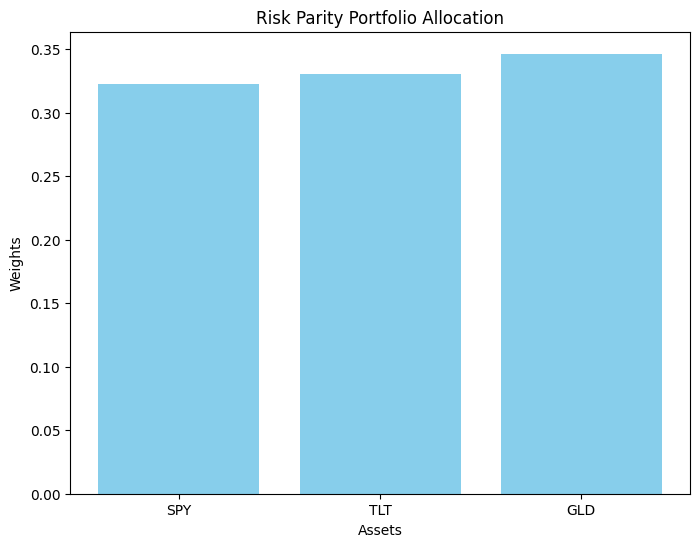

In [5]:
plt.figure(figsize=(8, 6))
plt.bar(tickers, risk_parity_weights, color='skyblue')
plt.title('Risk Parity Portfolio Allocation')
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.show()

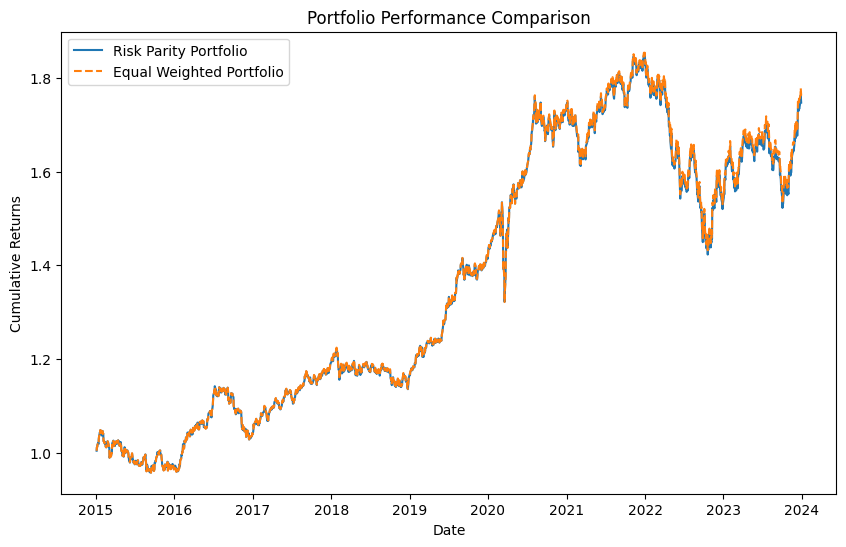

In [6]:
# Calculate portfolio returns
risk_parity_returns = np.dot(returns, risk_parity_weights)
equal_weighted_returns = np.dot(returns, np.ones(len(tickers)) / len(tickers))

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(returns.index, (1 + risk_parity_returns).cumprod(), label='Risk Parity Portfolio')
plt.plot(returns.index, (1 + equal_weighted_returns).cumprod(), label='Equal Weighted Portfolio', linestyle='--')
plt.title('Portfolio Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


### Conclusion and Takeaways

Risk parity is a powerful strategy for creating a balanced and diversified portfolio by equalizing the risk contributions of each asset. This approach is particularly useful in volatile markets, where traditional asset allocation might expose the portfolio to unnecessary risks. However, it is important to note that risk parity may not always be suitable for all investors or market conditions. For example, in markets with low volatility or highly correlated assets, the benefits of risk parity may be less pronounced.

#### Explanations and Use Cases

**Risk Parity Portfolio**: This strategy aims to create a more stable and diversified portfolio by balancing the risk contributions of each asset.

**Use Cases**:
- **Long-Term Investment Portfolios**: Risk parity is often used in building long-term investment portfolios, aiming for steady growth with minimized risk.
- **Pension Funds**: Large institutional investors like pension funds use risk parity to ensure that no single asset class dominates the portfolio risk, leading to more stable returns.
- **Hedge Funds**: Some hedge funds employ risk parity strategies to manage multi-asset portfolios, balancing risks across equities, bonds, commodities, and other asset classes.

This article demonstrates the process of building a risk parity portfolio using Python, highlighting the importance of balancing risk across assets. The code examples provided allow you to implement this strategy, evaluate its performance, and understand its real-world applications.


[*********************100%***********************]  3 of 3 completed


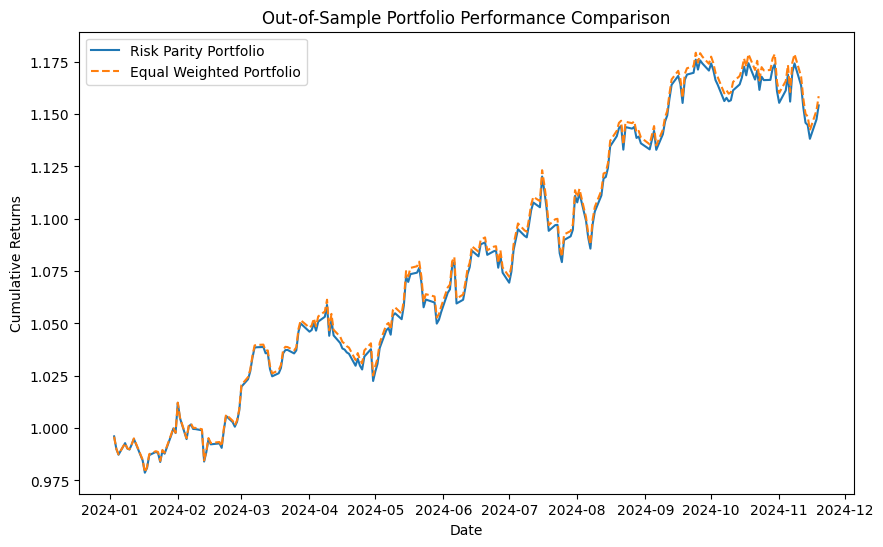

In [7]:
###Out of Sample test

# Download out-of-sample data
tickers = ['SPY', 'TLT', 'GLD']
out_of_sample_data = yf.download(tickers, start="2024-01-01", end="2024-11-20")['Adj Close']

# Calculate out-of-sample returns
out_of_sample_returns = out_of_sample_data.pct_change().dropna()

# Calculate portfolio returns using the existing weights
risk_parity_returns = np.dot(out_of_sample_returns, risk_parity_weights)
equal_weighted_returns = np.dot(out_of_sample_returns, np.ones(len(tickers)) / len(tickers))

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(out_of_sample_returns.index, (1 + risk_parity_returns).cumprod(), label='Risk Parity Portfolio')
plt.plot(out_of_sample_returns.index, (1 + equal_weighted_returns).cumprod(), label='Equal Weighted Portfolio', linestyle='--')
plt.title('Out-of-Sample Portfolio Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

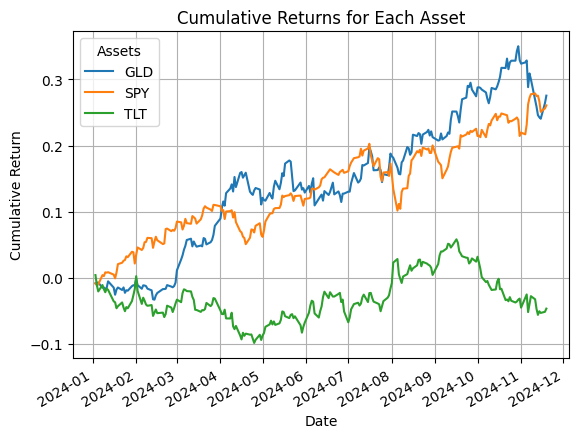

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate cumulative returns for each asset
cumulative_returns = (1 + out_of_sample_returns).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns for Each Asset')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(title='Assets')
plt.grid(True)
plt.show()


In [10]:
import pandas as pd

# Calculate weighted returns for each asset
weighted_returnsOSS = out_of_sample_returns * risk_parity_weights

# Calculate the contribution of each asset to the total portfolio return
contribution = weighted_returnsOSS.sum()

# Create a DataFrame to display the results
contribution_df = pd.DataFrame({
    'Asset': contribution.index,
    'Individual Return': contribution.values
})

# Display the table
print(contribution_df)
# contirbution for returns by each asset class invested in

  Asset  Individual Return
0   GLD           0.081796
1   SPY           0.078903
2   TLT          -0.013415
